In [10]:
%autosave 0

Autosave disabled


In [11]:
from IPython.core.display import HTML
css_file = '../../../style/style03my.css'
HTML(open(css_file, "r").read())

>### [Sergio Rojas](http://prof.usb.ve/srojas)<br>
[Departamento de F&iacute;sica](http://www.fis.usb.ve/), [Universidad Sim&oacute;n Bol&iacute;var](http://www.usb.ve/), [Venezuela](http://es.wikipedia.org/wiki/Venezuela)

>#### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2016-2017 Sergio Rojas (srojas@usb.ve).###

In [12]:
from IPython.display import Image

### <center><font color=red> Some pre-processing on data </font></center>

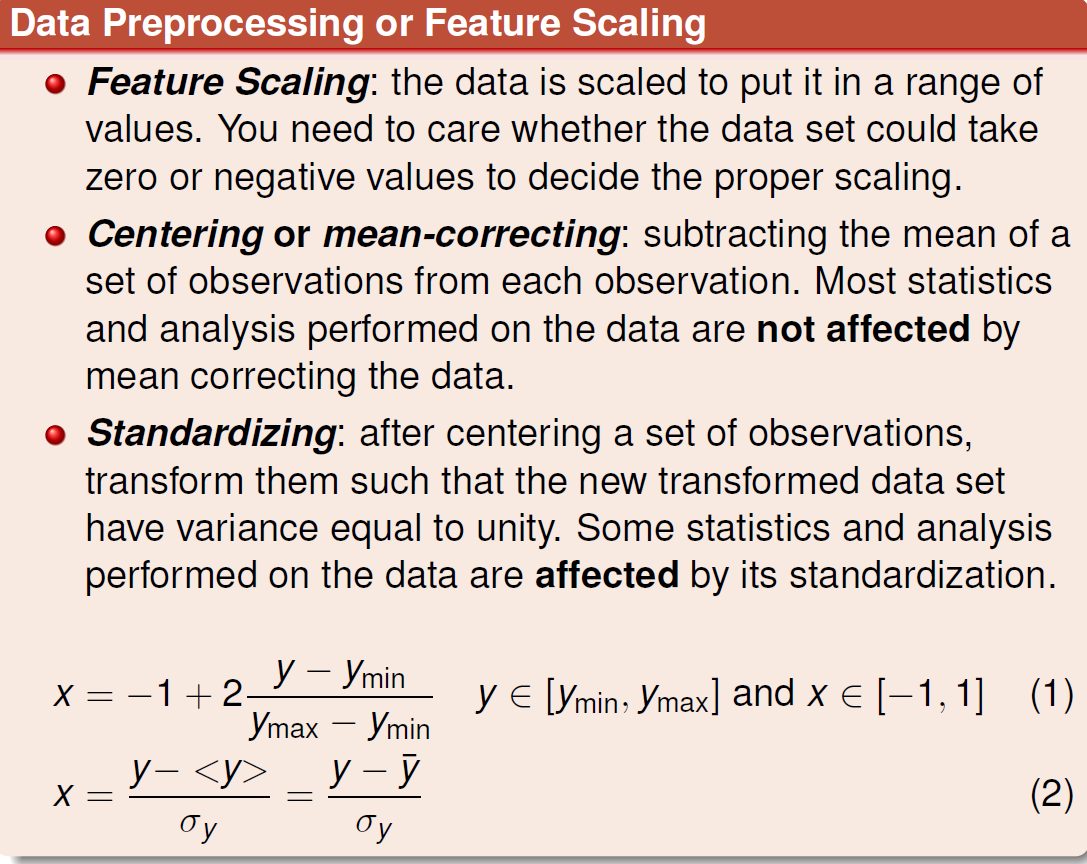

In [13]:
Image(filename='./Volume_1_Video_2.3_figs/Vol1_v23_03a.png')

### <center><font color=red> Representng data in matrix form </font></center>

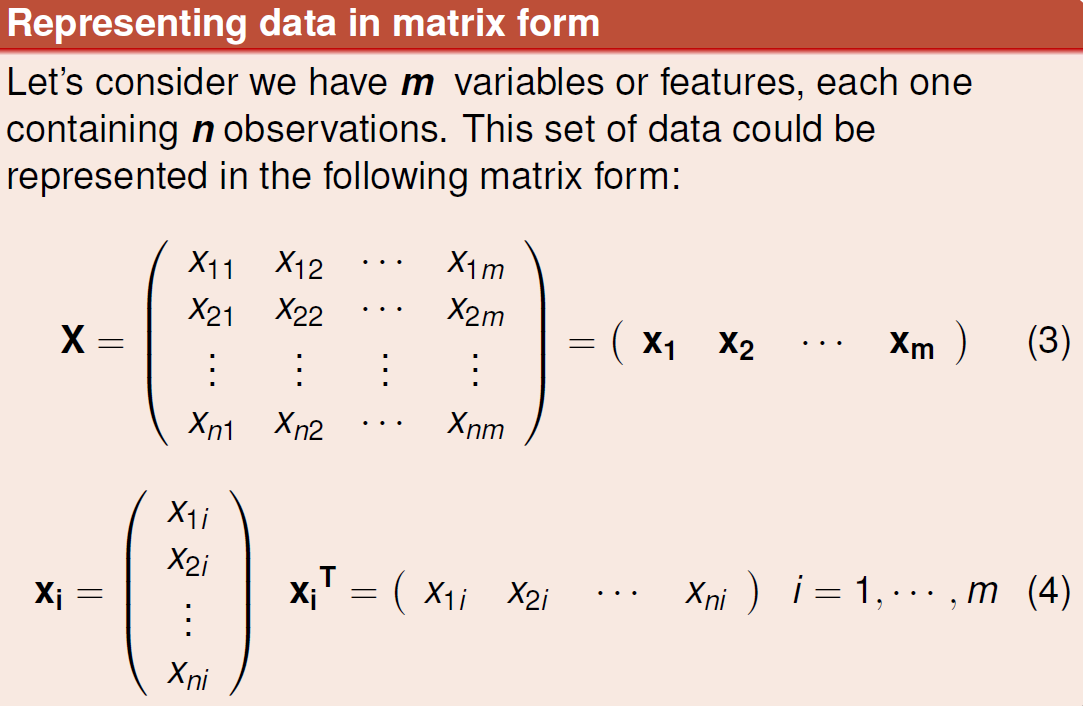

In [14]:
Image(filename='./Volume_1_Video_2.3_figs/Vol1_v23_03b.png')

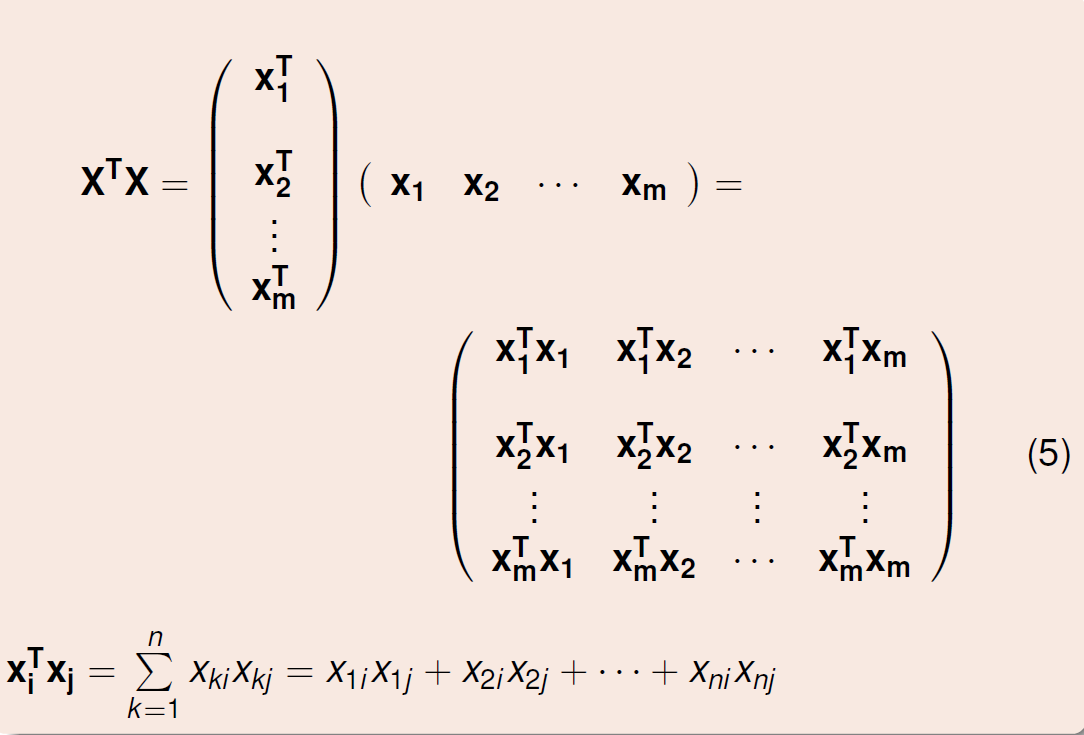

In [15]:
Image(filename='./Volume_1_Video_2.3_figs/Vol1_v23_03c.png')

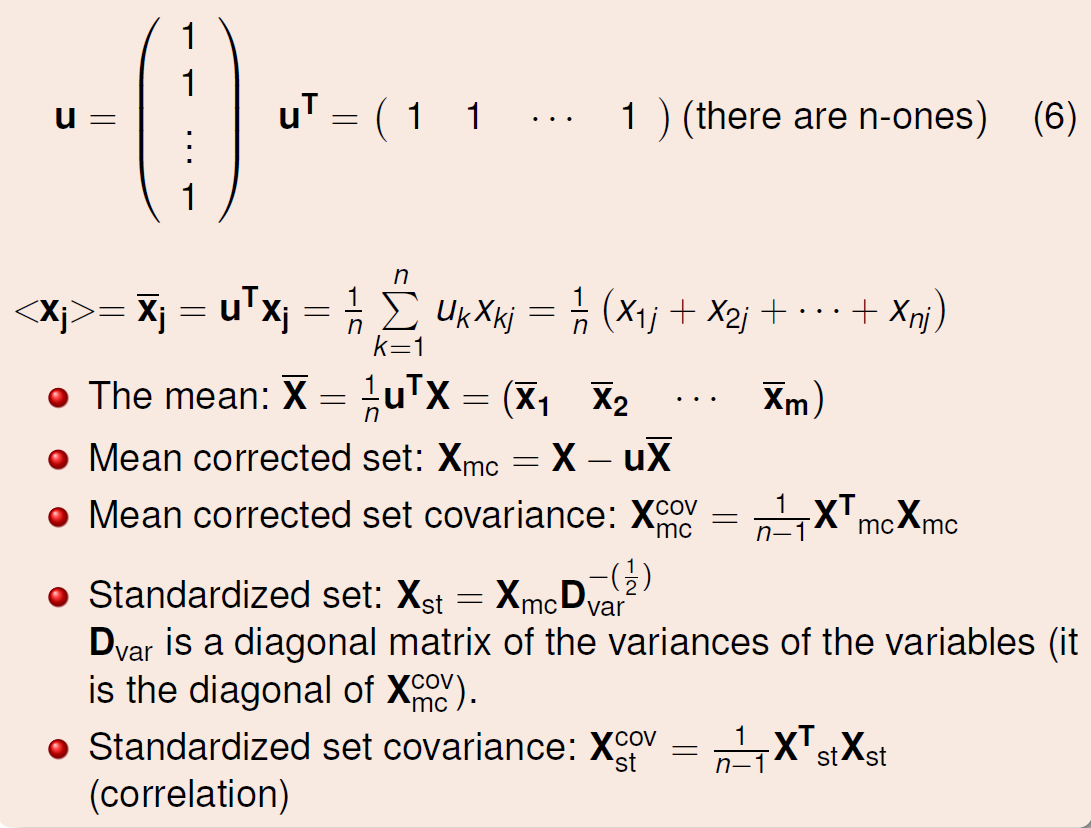

In [16]:
Image(filename='./Volume_1_Video_2.3_figs/Vol1_v23_03d.png')

## Building a test set (three features and ten observations)

In [17]:
import numpy as np
nrand = np.random.RandomState(1423)

In [18]:
ncols = 3  # number of variables or features
nrows = 10 # number of data points (observations per variable or feature)
X = nrand.rand(nrows,ncols)

X = np.round(X,2) # round matrix elements to two decimals
print(X)

[[ 0.14  0.37  0.88]
 [ 0.49  0.23  0.09]
 [ 0.02  0.85  0.54]
 [ 0.76  0.09  0.92]
 [ 0.35  0.11  0.49]
 [ 0.44  0.36  0.46]
 [ 0.38  0.85  0.29]
 [ 0.32  0.33  0.99]
 [ 0.61  0.05  0.61]
 [ 0.93  0.21  0.46]]


## Defining the vector $\textbf{U}$

In [19]:
U = np.ones((1,nrows))
print(U)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


## Computing $\overline{\textbf{X}}$: the mean of each feature 

In [20]:
Xmean = (1./nrows)*np.dot(U,X)
print(Xmean)

[[ 0.444  0.345  0.573]]


## Computing $\textbf{X}_\text{mc}$: the mean corrected set of features

In [21]:
Xmc = X - Xmean # Mean corrected

In [22]:
Xmc_mean = (1./nrows)*np.dot(U,Xmc)
print(Xmc_mean)

[[  6.66133815e-17  -4.71844785e-17  -6.10622664e-17]]


In [23]:
print(np.mean(Xmc, axis=0) - Xmc_mean)

[[ -1.23259516e-32   6.16297582e-33   0.00000000e+00]]


## Computing $\textbf{X}_\text{mc_cov}$: the covariance of the mean corrected set 

In [24]:
Xmc_cov = (1./(nrows-1))*np.dot(Xmc.T,Xmc)

In [25]:
print(np.cov(Xmc.T) - Xmc_cov)

[[  0.00000000e+00   0.00000000e+00   2.60208521e-18]
 [  0.00000000e+00  -1.38777878e-17   0.00000000e+00]
 [  4.33680869e-18   0.00000000e+00   1.38777878e-17]]


## Computing $\textbf{X}_\text{mc_var}$: the variance of the mean corrected set 

In [26]:
Xmc_var = np.eye(np.shape(Xmc_cov)[0])*Xmc_cov # takes diagonal of Xmc_cov
Xmc_var_diagonal = np.dot(np.ones((1,ncols)), Xmc_var )
Xmc_var_diagonal = Xmc_var_diagonal.flatten()
print(Xmc_var_diagonal)

[ 0.07402667  0.08331667  0.08186778]


In [27]:
print(np.var(Xmc, axis=0) - Xmc_var_diagonal)

[-0.00740267 -0.00833167 -0.00818678]


## Computing $\textbf{X}_\text{mc_std}$: the standard deviation  of the mean corrected set 

In [28]:
Xmc_std_diagonal = np.sqrt(Xmc_var_diagonal)
print(Xmc_std_diagonal)

[ 0.27207842  0.28864627  0.28612546]


In [29]:
print(np.std(Xmc, axis=0) - Xmc_std_diagonal)

[-0.01396217 -0.01481237 -0.01468301]


## Computing $\textbf{X}_\text{st}$: the standardized feature data set

In [30]:
Xmc_std_diagonal_inv = 1./Xmc_std_diagonal
Xmc_std_inv = np.eye(len(Xmc_std_diagonal_inv))*Xmc_std_diagonal_inv.T
print(Xmc_std_inv)

[[ 3.67541093  0.          0.        ]
 [ 0.          3.46444808  0.        ]
 [ 0.          0.          3.49497038]]


In [31]:
print(Xmc_std_inv - np.linalg.inv(np.sqrt(Xmc_var)))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [32]:
Xst = np.dot(Xmc,Xmc_std_inv) # standarized data

## Computing $\textbf{X}_\text{st_cov}$: the covariance of the standardized set (correlation)

In [33]:
Xst_cov = (1./(nrows-1))*np.dot(Xst.T,Xst)
print(Xst_cov)

[[ 1.         -0.60921625 -0.09422853]
 [-0.60921625  1.         -0.22729676]
 [-0.09422853 -0.22729676  1.        ]]


In [34]:
print(Xst_cov - np.cov(Xst.T))

[[  0.00000000e+00   2.22044605e-16   1.38777878e-17]
 [  2.22044605e-16   0.00000000e+00   5.55111512e-17]
 [  0.00000000e+00   0.00000000e+00   2.22044605e-16]]


In [35]:
print(np.corrcoef(Xst.T))

[[ 1.         -0.60921625 -0.09422853]
 [-0.60921625  1.         -0.22729676]
 [-0.09422853 -0.22729676  1.        ]]


### Additional readings

In [36]:
from IPython.display import HTML

<b>

In [37]:
HTML('<iframe src=http://www.scipy-lectures.org/packages/statistics/index.html width=700 height=350></iframe>')

Many computational examples can be found at:
<ul>
<li>
[A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)[https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks]
</ul>

>#### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2016-2017 Sergio Rojas (srojas@usb.ve). ###
